In [1]:

from astropy.table import Table, join
from astropy.cosmology import Planck18 as cosmo
from matplotlib import pyplot as plt
from tqdm import tqdm
from copy import deepcopy
from scipy.optimize import minimize
from scipy.special import erfc

import numpy as np
import matplotlib.colors as colors
import sncosmo
import lcdata

import parsnip



In [3]:
model = parsnip.load_model('models/model_roman_full.pt')
lcs = np.load('roman_test_predictions.npy', allow_pickle=True)


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/parsnip/parsnip.py:299: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  self.band_interpolate_weights = torch.FloatTensor(band_weights).to(self.device)


In [4]:
roman_classifier = parsnip.Classifier()
dataset = lcdata.read_hdf5('roman_test.h5')
preds = model.predict_dataset(dataset, augment=True)

Preprocessing dataset: 100%|██████████| 5985/5985 [00:04<00:00, 1239.25it/s]
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for s2_error
Length (128,) for s3
Length (128,) for s3_error
Length (128,) for total_s2n
Length (128,) for count
Length (128,) for count_s2n_3
Length (128,) for count_s2n_5
Length (128,) for count_s2n_3_pre
Length (128,) for count_s2n_3_rise
Length (128,) for count_s2n_3_fall
Length (128,) for count_s2n_3_post
Length (128,) for model_chisq
Length (128,) for model_dof
22
1
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for s2

In [4]:
import pandas as pd
res = pd.concat([pd.DataFrame.from_dict(lcs[i]) for i in range(len(lcs))], axis = 0) 

In [5]:
res.reset_index(inplace = True)

In [20]:
preds

object_id,ra,dec,type,redshift,MWEBV,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str21,float64,float64,str9,float64,float64,float64,float32,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float64
lcdata_ooaljx_0060000,215.21352,53.0597,CCSN,0.5288973,0.009071821,62445.10921736111,22.972834,62442.418034373375,1.215723,0.7111873,0.06851394,87.91534287669329,1.4450266785931098,-0.72365326,0.23097439,-1.437528,0.17717502,-0.5438202,0.37760976,67.12657,42,26,16,0,2,11,13,803.16797,36,-22.3330386558146,0.01784738636130029
lcdata_ooaljx_0060001,189.41228,62.26608,SNIa,1.0446846,0.010202995,62270.15017387152,23.112764,62264.50054489678,0.04656243,0.10115085,0.0046548885,20.61170204626581,0.3972281465700947,-0.23170324,0.04936477,-1.0976818,0.030496582,0.8732239,0.10432031,53.613834,122,39,23,0,9,19,11,181.73816,116,-22.562007386574408,0.020926868900733555
lcdata_ooaljx_0060002,53.10185,-27.73687,CCSN,1.5109224,0.007849923,62555.10921736111,6.0941358,62529.59715832953,0.7178459,-0.012931507,0.021102298,0.564186278265707,0.006282243581107444,-0.62980694,0.115367986,0.6299051,0.055624884,0.9425198,0.30787957,90.47289,129,103,94,0,7,25,71,115.5106,123,-19.642664240122624,0.012090228868690118
lcdata_ooaljx_0060003,189.18724,62.16983,CCSN,0.9317699,0.010013691,62709.95904348959,10.539545,62713.801131197244,0.22026472,-0.079651594,0.008081244,3.2009614812844593,0.07342381324467714,0.34387517,0.057508867,0.1468623,0.031119447,0.9219971,0.10797471,44.080334,37,21,17,0,12,9,0,41.757584,31,-20.23401677997457,0.024909040201632385
lcdata_ooaljx_0060004,150.17049,2.20151,SNIa,1.7508031,0.014653749,62150.013652170135,8.0612335,62142.90801741015,2.3937528,-0.08084604,0.08375925,0.8554836040510357,0.04629495671168053,-0.9693402,0.40096736,-0.6205095,0.27413094,0.0006626025,0.7018211,19.5923,59,13,3,0,4,9,0,42.3572,53,-20.487486997407032,0.058812656098161165
lcdata_ooaljx_0060005,189.35454,62.2261,CCSN,0.8193633,0.010337742,62305.19113038194,7.919001,62307.96325094862,0.22401842,-0.1197435,0.009147771,2.1434436953207983,0.04497931361116695,1.2475891,0.14725082,1.1540123,0.09607063,-0.9679241,0.21769473,48.967846,125,66,22,0,9,32,25,126.100586,119,-19.455610874697648,0.02278708770091329
lcdata_ooaljx_0060006,34.39351,-5.26081,CCSN,1.7742372,0.02009114,62585.04095651042,5.26982,62588.346122293326,1.9711277,-0.21392328,0.06637003,0.21006448613352238,0.015076364323256042,-0.7853471,0.4502086,1.1057526,0.3851765,-1.2616447,0.78156245,15.838668,79,6,2,0,4,2,0,56.608597,73,-18.99821290214988,0.07805768280810985
lcdata_ooaljx_0060007,53.1808,-27.69752,CCSN,1.1644549,0.0076407357,62485.1774782118,13.433611,62486.54953732483,0.13489768,-0.19250669,0.0078513045,3.196749372906906,0.04789298222978773,1.0197242,0.12698853,0.82198185,0.057198275,-0.29933488,0.18434842,69.48703,94,61,42,0,9,22,30,371.67184,88,-20.829073037416258,0.016267473512510795
lcdata_ooaljx_0060008,34.37165,-5.19567,CCSN,0.8723322,0.019564457,62340.14334778646,18.78243,62326.52606656854,0.06335335,0.29559225,0.005160063,13.795156273488304,0.09847762721114113,-0.5028532,0.025760863,-0.8681087,0.013386359,-0.84839964,0.050272908,140.74104,105,92,76,0,9,24,59,178.10028,99,-21.644134972032255,0.007750730716846774


In [5]:
"""dropped_types = ['ILOT', 'PISNb', 'TDE', 'SLSN']
mask = ~np.isin(preds['type'],dropped_types)

# Apply the mask to the table
preds_fl = preds[mask]"""

roman_plot_labels = ["SNIa",
"91bg-like",
"SNIax",
"CCSN",
"SLSN",
"ILOT",
"TDE",
"PISNb"]
preds['original_object_id'] = preds['object_id']

In [6]:

roman_train = lcdata.read_hdf5('roman_train.h5')
pred_train = model.predict_dataset(roman_train)

Preprocessing dataset: 100%|██████████| 60000/60000 [00:56<00:00, 1063.82it/s]
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for s2_error
Length (128,) for s3
Length (128,) for s3_error
Length (128,) for total_s2n
Length (128,) for count
Length (128,) for count_s2n_3
Length (128,) for count_s2n_5
Length (128,) for count_s2n_3_pre
Length (128,) for count_s2n_3_rise
Length (128,) for count_s2n_3_fall
Length (128,) for count_s2n_3_post
Length (128,) for model_chisq
Length (128,) for model_dof
22
1
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for 

In [16]:
roman_classifier = parsnip.Classifier()
pred_train['original_object_id'] = pred_train['object_id']
classifications_train = roman_classifier.train(pred_train, num_folds=10)


Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 1100, 42195,    32,     9,    65, 15731,   832,    36]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.601232


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.651576


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.534159


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.803482


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.629607


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.80064


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 1.06359


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 1.07814


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.557861


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.569897


In [17]:
classifications = roman_classifier.classify(preds)

In [19]:
test_classifier = parsnip.Classifier()
test_classifications = test_classifier.train(preds)

Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 111, 4230,    1,    2,    5, 1539,   95,    2]))
[100]	valid_0's multi_logloss: 2.72475
[100]	valid_0's multi_logloss: 2.73082


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


ValueError: y contains previously unseen labels: [2]

Macro averaged completeness (Villar et al. 2020): 0.6323
Fraction correct: 0.7021


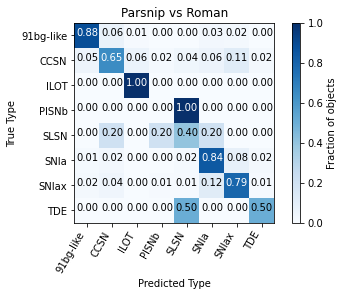

In [18]:

parsnip.plot_confusion_matrix(preds, classifications, title = 'Parsnip vs Roman')

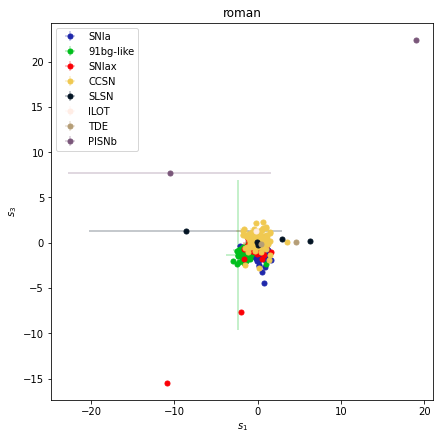

In [10]:
parsnip.plot_representation(preds, roman_plot_labels, idx1=1, idx2=3, max_count=100)
plt.title('roman')

plt.savefig('./roman_classification13.pdf')

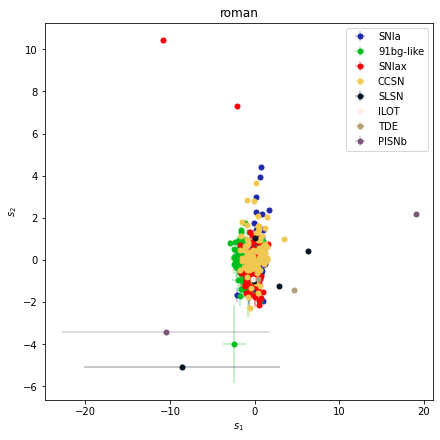

In [11]:
parsnip.plot_representation(preds, roman_plot_labels, idx1=1, idx2=2, max_count=100)
plt.title('roman')

plt.savefig('./roman_classification12.pdf')

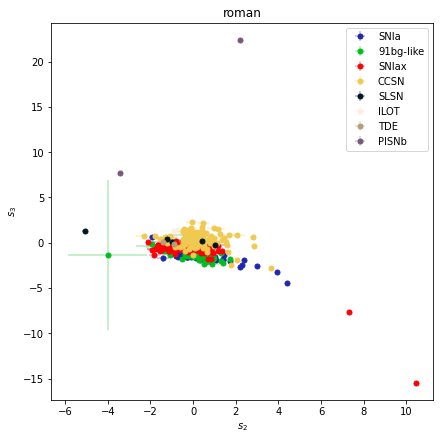

In [12]:
parsnip.plot_representation(preds, roman_plot_labels, idx1=2, idx2=3, max_count=100)
plt.title('roman')

plt.savefig('./roman_classification23.pdf')

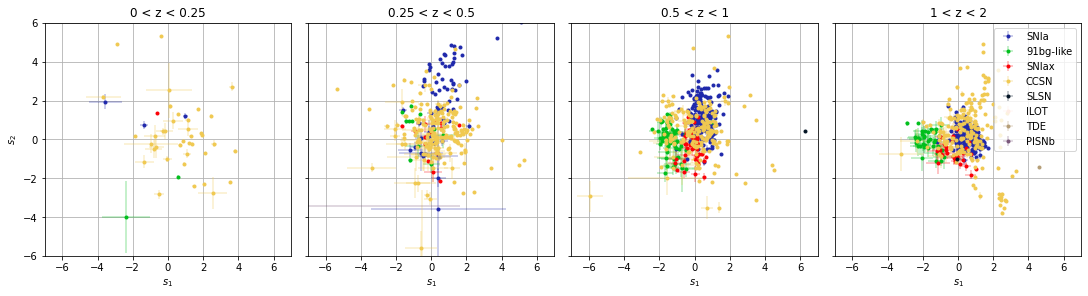

In [13]:
bins = (
    (0, 0.25),
    (0.25, 0.5),
    (0.5, 1),
    (1, 2),
)

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True,
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.02}, constrained_layout=True)

for idx in range(len(bins)):
    ax = axes[idx]
    min_z, max_z = bins[idx]
    predictions=preds

    mask = (predictions['redshift'] > min_z) & (predictions['redshift'] < max_z)
    use_pred = predictions[mask]
    use_pred.sort('total_s2n', reverse=True)

    kwargs = {}

    if idx == 3:
        kwargs['legend_ncol'] = 1
    else:
        kwargs['show_legend'] = False

    # Common plot
    parsnip.plot_representation(use_pred, roman_plot_labels, idx1=1, idx2=2, max_count=200,
                                markersize=3, ax=ax, **kwargs)
    ax.set_title(f'{min_z} < z < {max_z}')
    ax.set_xlim(-7., 7.)
    ax.set_ylim(-6, 6)
    if idx > 0:
        ax.set_ylabel('')
    ax.grid()
fig.savefig('roman_z_representation12.pdf')

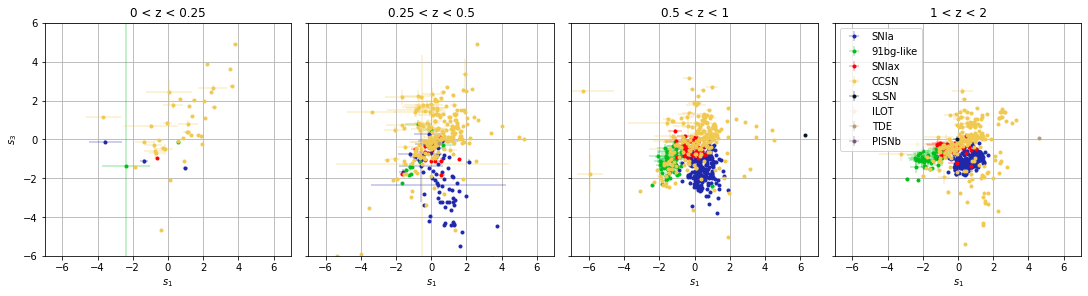

In [14]:
bins = (
    (0, 0.25),
    (0.25, 0.5),
    (0.5, 1),
    (1, 2),
)

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True,
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.02}, constrained_layout=True)

for idx in range(len(bins)):
    ax = axes[idx]
    min_z, max_z = bins[idx]

    mask = (predictions['redshift'] > min_z) & (predictions['redshift'] < max_z)
    use_pred = predictions[mask]
    use_pred.sort('total_s2n', reverse=True)

    kwargs = {}

    if idx == 3:
        kwargs['legend_ncol'] = 1
    else:
        kwargs['show_legend'] = False

    # Common plot
    parsnip.plot_representation(use_pred, roman_plot_labels, idx1=1, idx2=3, max_count=200,
                                markersize=3, ax=ax, **kwargs)
    ax.set_title(f'{min_z} < z < {max_z}')
    ax.set_xlim(-7., 7.)
    ax.set_ylim(-6, 6)
    if idx > 0:
        ax.set_ylabel('')
    ax.grid()
fig.savefig('roman_z_representation13.pdf')

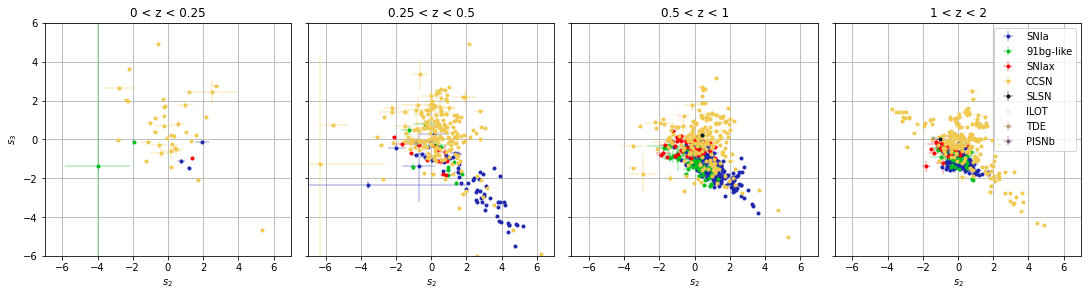

In [15]:
bins = (
    (0, 0.25),
    (0.25, 0.5),
    (0.5, 1),
    (1, 2),
)

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True,
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.02}, constrained_layout=True)

for idx in range(len(bins)):
    ax = axes[idx]
    min_z, max_z = bins[idx]

    mask = (predictions['redshift'] > min_z) & (predictions['redshift'] < max_z)
    use_pred = predictions[mask]
    use_pred.sort('total_s2n', reverse=True)

    kwargs = {}

    if idx == 3:
        kwargs['legend_ncol'] = 1
    else:
        kwargs['show_legend'] = False

    # Common plot
    parsnip.plot_representation(use_pred, roman_plot_labels, idx1=2, idx2=3, max_count=200,
                                markersize=3, ax=ax, **kwargs)
    ax.set_title(f'{min_z} < z < {max_z}')
    ax.set_xlim(-7., 7.)
    ax.set_ylim(-6, 6)
    if idx > 0:
        ax.set_ylabel('')
    ax.grid()
fig.savefig('roman_z_representation23.pdf')

In [18]:
roman_classifier = parsnip.Classifier()

In [26]:
unique_labels = predictions['type'].unique()
print(f"Unique labels in training data: {unique_labels}")


AttributeError: 'Column' object has no attribute 'unique'

In [25]:
classifications = roman_classifier.train(predictions = predictions, labels = predictions['type'])

Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
[100]	valid_0's multi_logloss: 2.17929
[100]	valid_0's multi_logloss: 2.73006


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-package

[100]	valid_0's multi_logloss: 2.73006


ValueError: y contains previously unseen labels: [3]

In [20]:
set(predictions['type'])

{'91bg-like', 'CCSN', 'ILOT', 'PISNb', 'SLSN', 'SNIa', 'SNIax', 'TDE'}

In [12]:
len(list(preprocessed.meta['parsnip_reference_time']))

6624

In [30]:
dataset = lcdata.read_hdf5('data/roman_test.h5')
preds = model.predict_dataset(dataset)

Preprocessing dataset: 100%|██████████| 6624/6624 [00:05<00:00, 1189.64it/s]
<Table length=128>
        name          dtype  shape 
-------------------- ------- ------
      reference_time float64 (128,)
reference_time_error float32       
               color float32       
         color_error float32       
           amplitude float32       
     amplitude_error float32       
                  s1 float32       
            s1_error float32       
                  s2 float32       
            s2_error float32       
                  s3 float32       
            s3_error float32       
           total_s2n float32       
               count   int64       
         count_s2n_3   int64       
         count_s2n_5   int64       
     count_s2n_3_pre   int64       
    count_s2n_3_rise   int64       
    count_s2n_3_fall   int64       
    count_s2n_3_post   int64       
         model_chisq float32       
           model_dof   int64       

[<Table length=128>
             refere

TableMergeError: columns have different shapes

Macro averaged completeness (Villar et al. 2020): 0.0000
Fraction correct: 0.0000


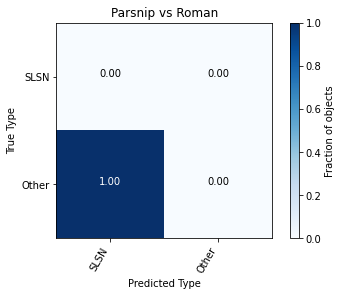